[View in Colaboratory](https://colab.research.google.com/github/Shreyas3108/Multipath-selection-using-ML/blob/master/TreeClass.ipynb)

In [1]:
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

Saving mpdata.csv to mpdata.csv
User uploaded file "mpdata.csv" with length 23625421 bytes


In [0]:
import pandas as pd 
import numpy as np 

In [0]:
data = pd.read_csv('mpdata.csv')

In [3]:
data.head()

,name,time,EncodingPath,Producer,bandwidth,input-data-rate,input-load,input-packet-rate,interface-name,load-interval,output-data-rate,output-load,output-packet-rate,reliability,peak-input-data-rate,peak-output-data-rate,peak-input-packet-rate,peak-output-packet-rate,delay
0,Cisco-IOS-XR-infra-statsd-oper:infra-statistic...,1501867007733000000,Cisco-IOS-XR-infra-statsd-oper:infra-statistic...,leaf1,100000000.0,7214502.0,18.0,639356.0,Path-1,0.0,12225031.0,31.0,1080487.0,255.0,0.0,0.0,0.0,0.0,0
1,Cisco-IOS-XR-infra-statsd-oper:infra-statistic...,1501867007735000000,Cisco-IOS-XR-infra-statsd-oper:infra-statistic...,leaf1,100000000.0,6564805.0,16.0,598775.0,Path-1,0.0,11132639.0,28.0,980453.0,255.0,0.0,0.0,0.0,0.0,7
2,Cisco-IOS-XR-infra-statsd-oper:infra-statistic...,1501867007738000000,Cisco-IOS-XR-infra-statsd-oper:infra-statistic...,leaf1,100000000.0,13838151.0,35.0,1217949.0,Path-1,0.0,9664580.0,24.0,856189.0,255.0,0.0,0.0,0.0,0.0,3
3,Cisco-IOS-XR-infra-statsd-oper:infra-statistic...,1501867007740000000,Cisco-IOS-XR-infra-statsd-oper:infra-statistic...,leaf1,100000000.0,10752468.0,27.0,968818.0,Path-1,0.0,13502426.0,34.0,1146930.0,255.0,0.0,0.0,0.0,0.0,0
4,Cisco-IOS-XR-infra-statsd-oper:infra-statistic...,1501867007742000000,Cisco-IOS-XR-infra-statsd-oper:infra-statistic...,leaf1,100000000.0,6925863.0,17.0,605078.0,Path-2,0.0,12163551.0,31.0,1055221.0,255.0,0.0,0.0,0.0,0.0,8


In [0]:
from sklearn.preprocessing import LabelEncoder

In [0]:
le = LabelEncoder()
data['path'] = le.fit_transform(data['interface-name'])

In [0]:
data = pd.get_dummies(data , columns= ['Producer'])

In [7]:
data.head()

,name,time,EncodingPath,bandwidth,input-data-rate,input-load,input-packet-rate,interface-name,load-interval,output-data-rate,...,Producer_leaf3,Producer_leaf4,Producer_leaf5,Producer_leaf6,Producer_leaf7,Producer_leaf8,Producer_spine1,Producer_spine2,Producer_spine3,Producer_spine4
0,Cisco-IOS-XR-infra-statsd-oper:infra-statistic...,1501867007733000000,Cisco-IOS-XR-infra-statsd-oper:infra-statistic...,100000000.0,7214502.0,18.0,639356.0,Path-1,0.0,12225031.0,...,0,0,0,0,0,0,0,0,0,0
1,Cisco-IOS-XR-infra-statsd-oper:infra-statistic...,1501867007735000000,Cisco-IOS-XR-infra-statsd-oper:infra-statistic...,100000000.0,6564805.0,16.0,598775.0,Path-1,0.0,11132639.0,...,0,0,0,0,0,0,0,0,0,0
2,Cisco-IOS-XR-infra-statsd-oper:infra-statistic...,1501867007738000000,Cisco-IOS-XR-infra-statsd-oper:infra-statistic...,100000000.0,13838151.0,35.0,1217949.0,Path-1,0.0,9664580.0,...,0,0,0,0,0,0,0,0,0,0
3,Cisco-IOS-XR-infra-statsd-oper:infra-statistic...,1501867007740000000,Cisco-IOS-XR-infra-statsd-oper:infra-statistic...,100000000.0,10752468.0,27.0,968818.0,Path-1,0.0,13502426.0,...,0,0,0,0,0,0,0,0,0,0
4,Cisco-IOS-XR-infra-statsd-oper:infra-statistic...,1501867007742000000,Cisco-IOS-XR-infra-statsd-oper:infra-statistic...,100000000.0,6925863.0,17.0,605078.0,Path-2,0.0,12163551.0,...,0,0,0,0,0,0,0,0,0,0


In [0]:
inp = data[['bandwidth','input-data-rate','input-load','load-interval','output-data-rate','output-load',
            'output-packet-rate','reliability','peak-input-data-rate','peak-output-data-rate'
           ,'peak-input-packet-rate', 'peak-output-packet-rate', 'delay','Producer_leaf1', 
            'Producer_leaf2', 'Producer_leaf3', 'Producer_leaf4','Producer_leaf5',
            'Producer_leaf6', 'Producer_leaf7', 'Producer_leaf8',
           'Producer_spine1', 'Producer_spine2', 'Producer_spine3',
           'Producer_spine4']] 
out = data['path']

In [0]:
from sklearn.cross_validation import train_test_split
x_train , y_train , x_test , y_test = train_test_split(inp , out ,
                                                       test_size = 0.3,random)

In [13]:
!pip install pandas-ml

    100% |████████████████████████████████| 81kB 2.2MB/s 
  Running setup.py bdist_wheel for pandas-ml ... - done
  Stored in directory: /content/.cache/pip/wheels/4b/b0/88/51fb7203a0f81becae3e92d5bf9fee0460375e5408e67a7dc3
Successfully built pandas-ml
You are using pip version 9.0.3, however version 10.0.1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


84.47276940903824
('Accuracy Score : ', 84.47276940903824)
DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')
Predicted     0     1     2     3  __all__
Actual                                    
0           455   458   446   445     1804
1           469   469   462   436     1836
2           433   441   463   444     1781
3           483   469   486   447     1885
__all__    1840  1837  1857  1772     7306


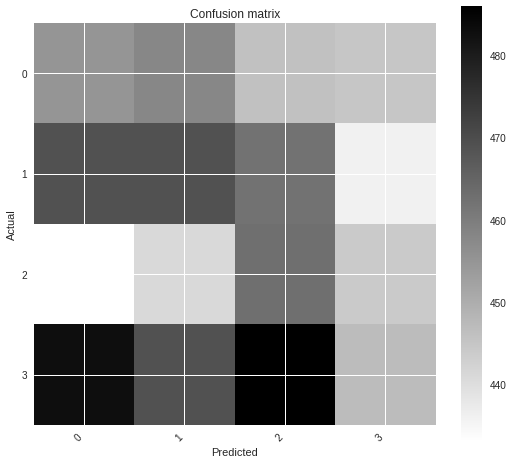

In [47]:
from sklearn.tree import DecisionTreeClassifier 
from sklearn.metrics import accuracy_score , confusion_matrix
from pandas_ml import ConfusionMatrix

mod = DecisionTreeClassifier() 
mod.fit(x_train , x_test) 
pred = mod.predict(y_train) 
y_pred = accuracy_score(y_test , pred)
print(y_pred * 100)
cm = ConfusionMatrix(y_test , pred)
cm.plot()
print('Accuracy Score : ' , y_pred*100) 
print(mod)
print(cm)

('Accuracy Score : ', 84.51829167356398)
DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')
Predicted     0     1     2     3  __all__
Actual                                    
0           452   458   443   451     1804
1           481   472   448   435     1836
2           439   442   452   448     1781
3           479   467   486   453     1885
__all__    1851  1839  1829  1787     7306


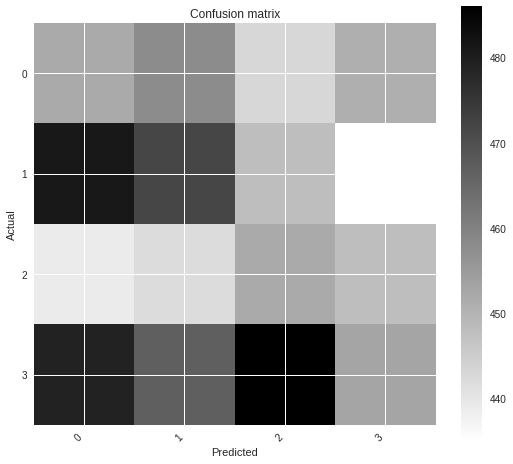

('Accuracy Score : ', 84.66727363019368)
DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=400,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')
Predicted     0     1     2     3  __all__
Actual                                    
0           460   469   448   427     1804
1           480   451   464   441     1836
2           443   449   450   439     1781
3           488   474   483   440     1885
__all__    1871  1843  1845  1747     7306


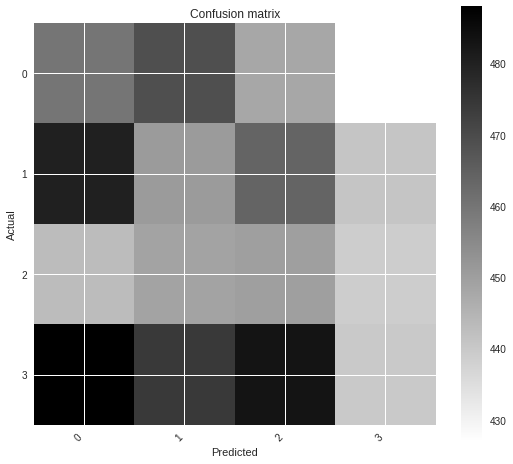

In [37]:
mod = DecisionTreeClassifier(criterion = 'entropy' , max_depth = 400) 

mod.fit(x_train , x_test) 
pred = mod.predict(y_train) 
y_pred = accuracy_score(y_test , pred)
cm = ConfusionMatrix(y_test , pred)
cm.plot()
print('Accuracy Score : ' , y_pred*100) 
print(mod)
print(cm)

('Accuracy Score : ', 37.332395298791596)
LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='multinomial',
          n_jobs=1, penalty='l2', random_state=None, solver='lbfgs',
          tol=0.0001, verbose=0, warm_start=False)
Predicted     0     1    2     3  __all__
Actual                                   
0           692   521  175   416     1804
1           720   503  161   452     1836
2           675   532  173   401     1781
3           693   529  172   491     1885
__all__    2780  2085  681  1760     7306


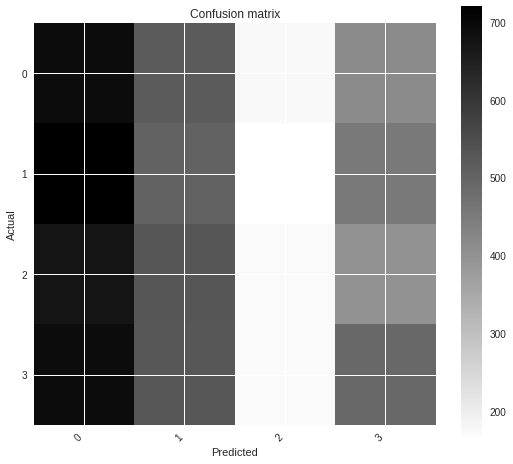

In [38]:
from sklearn.linear_model import LogisticRegression
mod = LogisticRegression(multi_class = 'multinomial' , solver='lbfgs') 
mod.fit(x_train , x_test) 
pred = mod.predict(y_train) 
y_pred = accuracy_score(y_test , pred)
cm = ConfusionMatrix(y_test , pred)
cm.plot()
print('Accuracy Score : ' , y_pred*100) 
print(mod)
print(cm)

('Accuracy Score : ', 75.20691938420792)
GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=100,
              presort='auto', random_state=None, subsample=1.0, verbose=0,
              warm_start=False)
Predicted     0     1     2     3  __all__
Actual                                    
0           447   445   430   482     1804
1           450   473   421   492     1836
2           435   469   433   444     1781
3           472   453   453   507     1885
__all__    1804  1840  1737  1925     7306


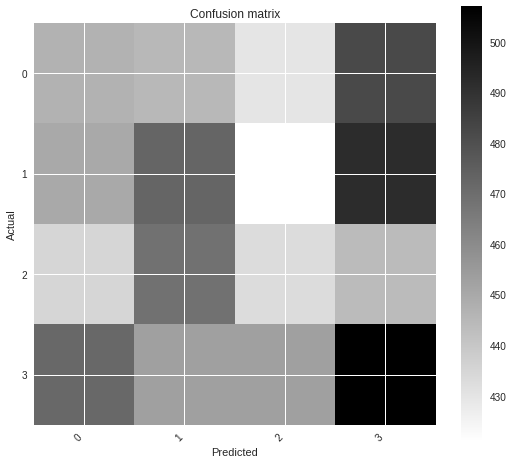

In [39]:
from sklearn.ensemble import GradientBoostingClassifier
mod = GradientBoostingClassifier() 
mod.fit(x_train , x_test) 
pred = mod.predict(y_train) 
y_pred = accuracy_score(y_test , pred)
cm = ConfusionMatrix(y_test , pred)
cm.plot()
print('Accuracy Score : ' , y_pred*100) 
print(mod)
print(cm)

In [0]:
from sklearn.ensemble import RandomForestClassifier

('Accuracy Score : ', 85.97500413838769)
RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)
Predicted     0     1     2     3  __all__
Actual                                    
0           478   459   441   426     1804
1           499   458   450   429     1836
2           456   455   442   428     1781
3           502   457   486   440     1885
__all__    1935  1829  1819  1723     7306


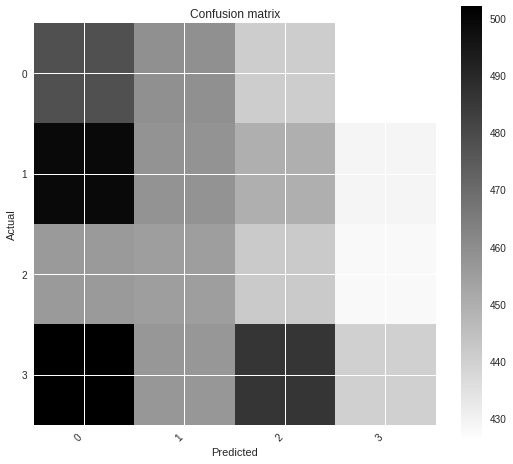

In [41]:
mod2 = RandomForestClassifier()
mod2.fit(x_train , x_test)
pred2 = mod2.predict(y_train)
y_pred = accuracy_score(y_test , pred2)
cm = ConfusionMatrix(y_test , pred2)
cm.plot()
print('Accuracy Score : ' , y_pred*100) 
print(mod2)
print(cm)

('Accuracy Score : ', 86.86475749048171)
RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=400, max_features=7, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=20, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)
Predicted     0     1     2     3  __all__
Actual                                    
0           470   460   439   435     1804
1           480   472   449   435     1836
2           448   456   440   437     1781
3           493   467   478   447     1885
__all__    1891  1855  1806  1754     7306


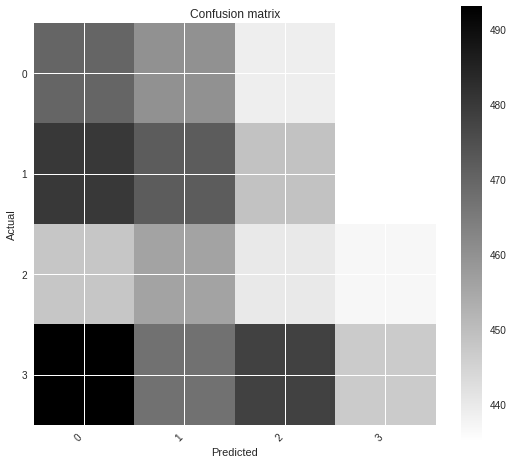

In [42]:
mod2 = RandomForestClassifier(criterion = 'entropy' ,n_estimators = 20 , max_depth= 400 , max_features= 7)
mod2.fit(x_train , x_test)
pred2 = mod2.predict(y_train)
y_pred = accuracy_score(y_test , pred2)
cm = ConfusionMatrix(y_test , pred2)
cm.plot()
print('Accuracy Score : ' , y_pred*100) 
print(mod2)
print(cm)

('Accuracy Score : ', 86.68266843237873)
RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=400, max_features=8, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=20, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)
Predicted     0     1     2     3  __all__
Actual                                    
0           468   454   442   440     1804
1           499   468   445   424     1836
2           443   461   441   436     1781
3           492   466   477   450     1885
__all__    1902  1849  1805  1750     7306


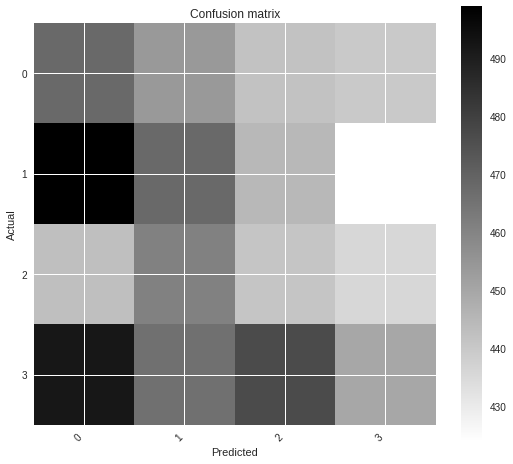

In [43]:
mod2 = RandomForestClassifier(n_estimators = 20 , max_depth = 400 , max_features = 8 )
mod2.fit(x_train , x_test)
pred2 = mod2.predict(y_train)
y_pred = accuracy_score(y_test , pred2)
cm = ConfusionMatrix(y_test , pred2)
cm.plot()
print('Accuracy Score : ' , y_pred*100) 
print(mod2)
print(cm)

In [0]:
from sklearn.ensemble import ExtraTreesClassifier

('Accuracy Score : ', 86.69922198311538)
ExtraTreesClassifier(bootstrap=False, class_weight=None, criterion='gini',
           max_depth=200, max_features=8, max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=25, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)
Predicted     0     1     2     3  __all__
Actual                                    
0           462   450   447   445     1804
1           498   450   452   436     1836
2           441   462   444   434     1781
3           504   454   484   443     1885
__all__    1905  1816  1827  1758     7306


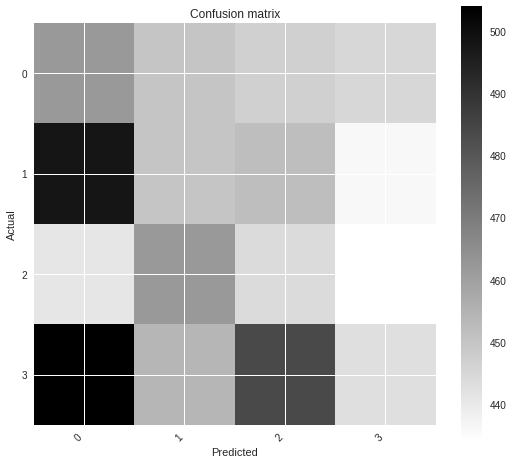

In [44]:
mod3 = ExtraTreesClassifier(n_estimators= 25 , max_depth= 200 , max_features = 8 )
mod3.fit(x_train, x_test)
pred3 = mod3.predict(y_train)
y_pred = accuracy_score(y_test , pred3)
cm = ConfusionMatrix(y_test , pred3)
cm.plot()
print('Accuracy Score : ' , y_pred*100) 
print(mod3)
print(cm)

('Accuracy Score : ', 87.19996689289853)
ExtraTreesClassifier(bootstrap=False, class_weight=None, criterion='gini',
           max_depth=400, max_features=16, max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=25, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)
Predicted     0     1     2     3  __all__
Actual                                    
0           461   448   447   448     1804
1           487   458   454   437     1836
2           447   449   448   437     1781
3           499   465   481   440     1885
__all__    1894  1820  1830  1762     7306


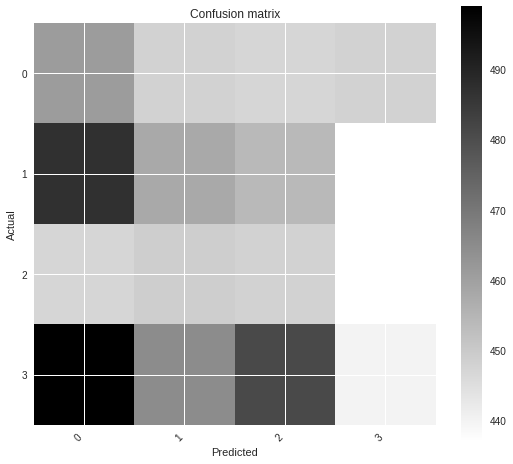

In [45]:
mod3 = ExtraTreesClassifier(n_estimators= 25 , max_depth= 400 , max_features = 16 )
mod3.fit(x_train, x_test)
pred3 = mod3.predict(y_train)
y_pred = accuracy_score(y_test , pred3)
cm = ConfusionMatrix(y_test , pred3)
cm.plot()
print('Accuracy Score : ' , y_pred*100) 
print(mod3)
print(cm)

('Accuracy Score : ', 87.06340009932131)
ExtraTreesClassifier(bootstrap=False, class_weight=None, criterion='entropy',
           max_depth=400, max_features=16, max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=25, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)
Predicted     0     1     2     3  __all__
Actual                                    
0           465   456   439   444     1804
1           486   458   448   444     1836
2           444   457   448   432     1781
3           505   459   477   444     1885
__all__    1900  1830  1812  1764     7306


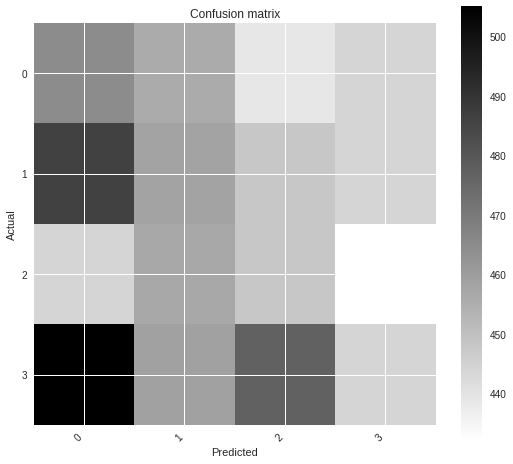

In [46]:
mod3 = ExtraTreesClassifier(criterion = 'entropy' , n_estimators = 25 , max_features = 16 , max_depth = 400)
mod3.fit(x_train, x_test)
pred3 = mod3.predict(y_train)
y_pred = accuracy_score(y_test , pred3)
cm = ConfusionMatrix(y_test , pred3)
cm.plot()
print('Accuracy Score : ' , y_pred*100) 

print(mod3)
print(cm)

In [31]:
cm

Predicted     0     1     2     3  __all__
Actual                                    
0           452   457   452   443     1804
1           479   463   453   441     1836
2           451   453   448   429     1781
3           512   460   477   436     1885
__all__    1894  1833  1830  1749     7306